### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


<b>The company wants to know</b>:<br>
Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

<b>Business Goal:</b> 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Importing all the relevant Libraries

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os
from sklearn.preprocessing import StandardScaler


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# scaling the features
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score

from matplotlib.pyplot import xticks

In [269]:
df = pd.read_csv('train.csv')

### Basic Data Exploration

In [270]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [271]:
df.shape

(1460, 81)

In [272]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [274]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking Null Values

In [275]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [276]:
# we will drop the columns having more than 70% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>60)].columns, 1)

In [277]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [278]:
for column in df:
    if df[column].isnull().any():
        x = df[column].isnull().sum()/len(df.index)*100
        print('{0}  ------->   {1}% null values'.format(column, round(x,2)))

LotFrontage  ------->   17.74% null values
MasVnrType  ------->   0.55% null values
MasVnrArea  ------->   0.55% null values
BsmtQual  ------->   2.53% null values
BsmtCond  ------->   2.53% null values
BsmtExposure  ------->   2.6% null values
BsmtFinType1  ------->   2.53% null values
BsmtFinType2  ------->   2.6% null values
Electrical  ------->   0.07% null values
FireplaceQu  ------->   47.26% null values
GarageType  ------->   5.55% null values
GarageYrBlt  ------->   5.55% null values
GarageFinish  ------->   5.55% null values
GarageQual  ------->   5.55% null values
GarageCond  ------->   5.55% null values


##### For null values where the percentages are less than 5 percent we can drop these rows and for other variables we can impute the median and mean respectively. For the variables having more than 40% null values we can see if there is a need to impute this column or not

In [279]:
df.FireplaceQu.describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [280]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, df['FireplaceQu'].mode()[0])

In [281]:
for column in df:
    if df[column].isnull().any():
        x = df[column].isnull().sum()/len(df.index)*100
        print('{0}  ------->   {1}% null values'.format(column, round(x,2)))

MasVnrType  ------->   0.55% null values
MasVnrArea  ------->   0.55% null values
BsmtQual  ------->   2.53% null values
BsmtCond  ------->   2.53% null values
BsmtExposure  ------->   2.6% null values
BsmtFinType1  ------->   2.53% null values
BsmtFinType2  ------->   2.6% null values
Electrical  ------->   0.07% null values
GarageType  ------->   5.55% null values
GarageYrBlt  ------->   5.55% null values
GarageFinish  ------->   5.55% null values
GarageQual  ------->   5.55% null values
GarageCond  ------->   5.55% null values


In [282]:
### Checking the different values to impute and whether to impute mean or not.

print(df.MasVnrArea.describe()) # ---> Median
print(df.MasVnrType.describe()) # ---> Mode
print(df.BsmtQual.describe()) # ---> Mode
print(df.BsmtCond.describe()) # ---> Mode
print(df.BsmtExposure.describe()) # ---> Mode
print(df.BsmtFinType1.describe()) # ---> Mode
print(df.BsmtFinType2.describe()) # ---> Mode
print(df.Electrical.describe()) #-----> Mode
print(df.GarageType.describe()) #----> Mode
print(df.GarageYrBlt.describe()) #----> Mode
print(df.GarageFinish.describe()) #----> Mode
print(df.GarageQual.describe()) #----> Mode
print(df.GarageCond.describe()) #----> Mode

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
count    1379.000000
mean     1978.506164
std    

### Imputing Null Values

In [283]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, df['BsmtCond'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, df['BsmtExposure'].mode()[0])
df['Electrical'] = df['Electrical'].replace(np.nan, df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].replace(np.nan, df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, df['GarageFinish'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].mode()[0])
df['GarageQual'] = df['GarageQual'].replace(np.nan, df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].replace(np.nan, df['GarageCond'].mode()[0])

In [284]:
for column in df:
    if df[column].isnull().any():
        x = df[column].isnull().sum()/len(df.index)*100
        print('{0}  ------->   {1}% null values'.format(column, round(x,2)))

In [285]:
### The above null values can be dropped from the data, since the values are not that significant

df = df.dropna()

In [286]:
for column in df:
    if df[column].isnull().any():
        x = df[column].isnull().sum()/len(df.index)*100
        print('{0}  ------->   {1}% null values'.format(column, round(x,2)))

In [287]:
df._get_numeric_data().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [288]:
df_col_numeric = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [289]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [290]:
df_col_object = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [291]:
df._get_numeric_data().describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Visualization

Essentially to check whether we can manipulate some other columns or not

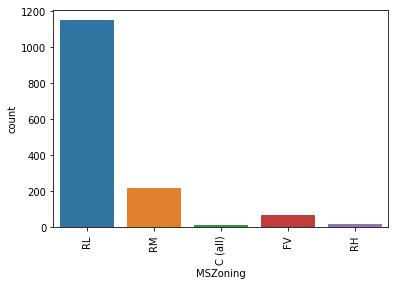

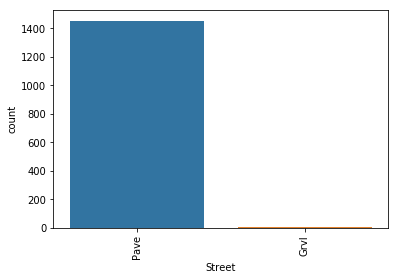

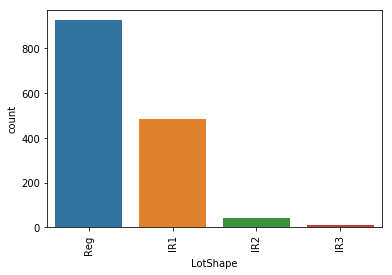

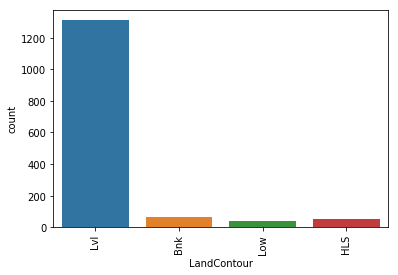

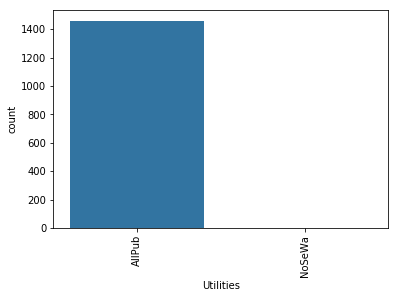

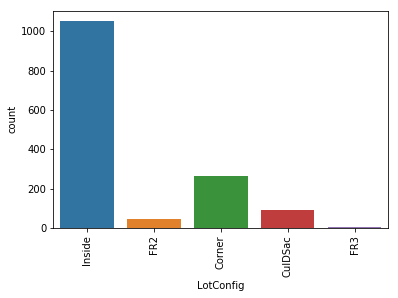

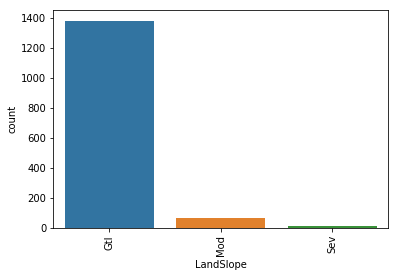

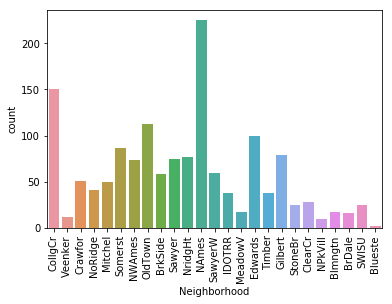

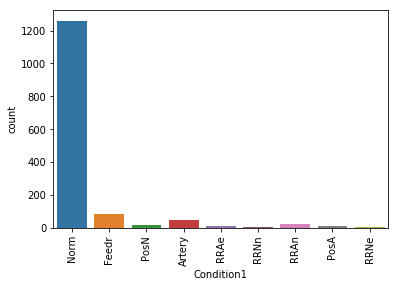

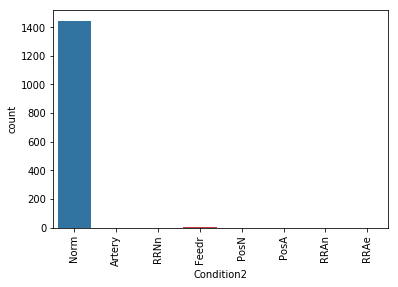

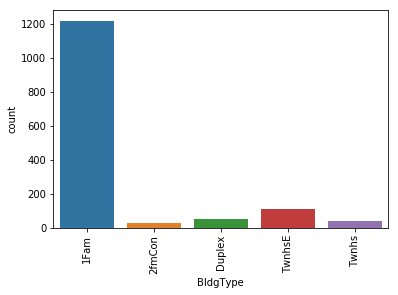

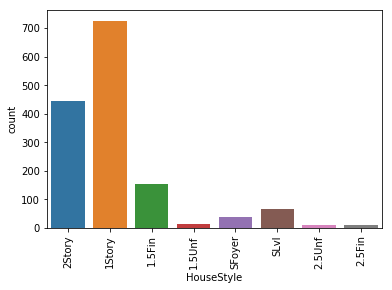

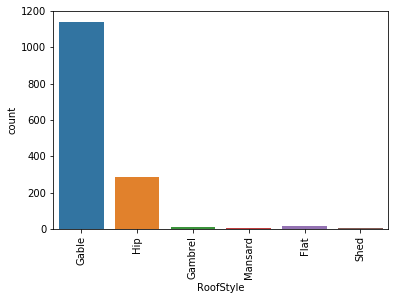

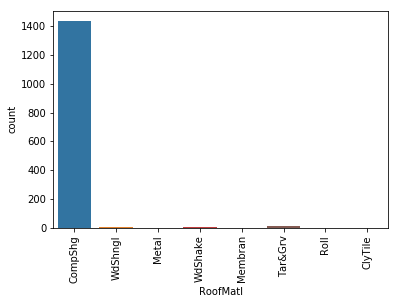

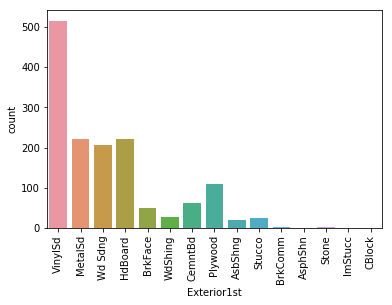

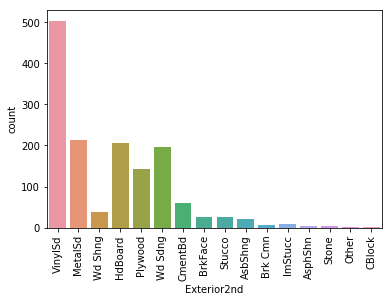

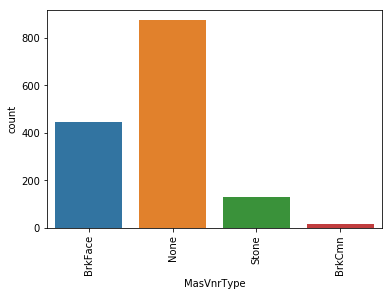

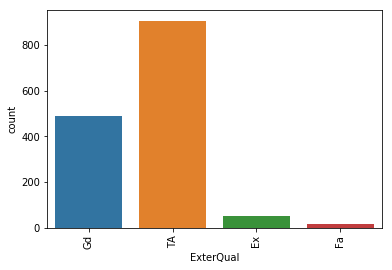

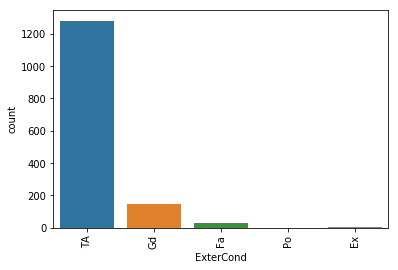

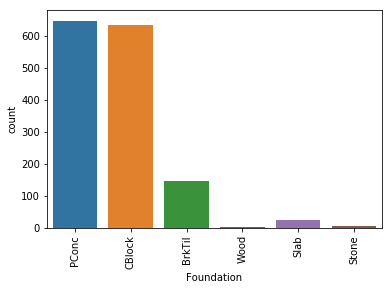

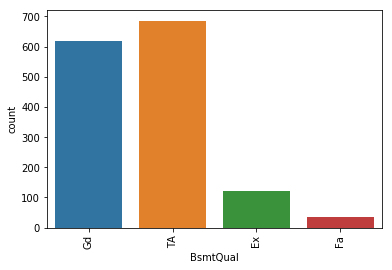

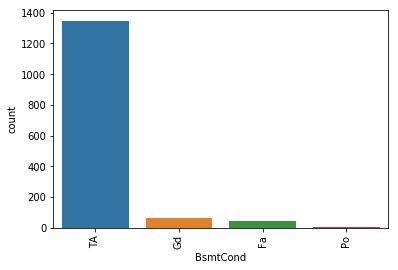

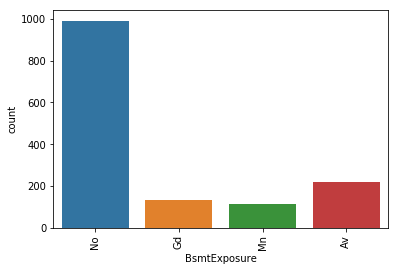

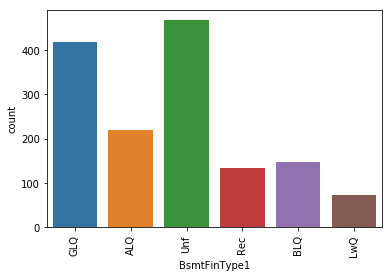

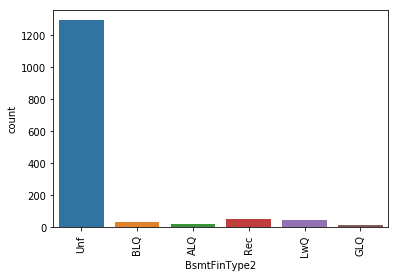

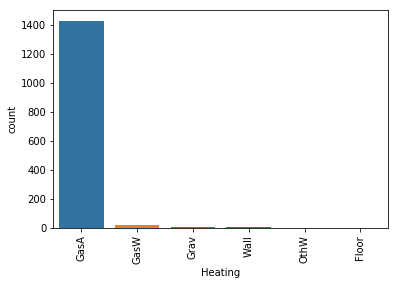

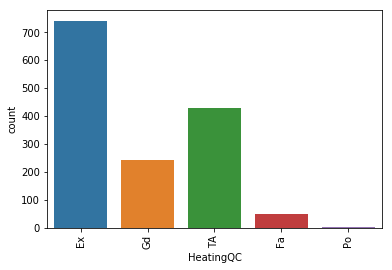

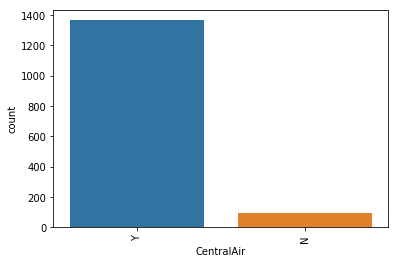

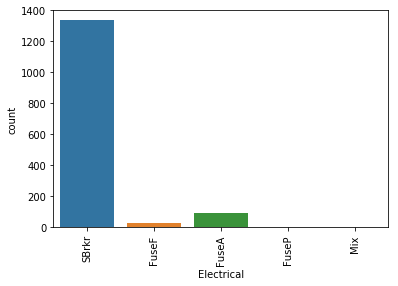

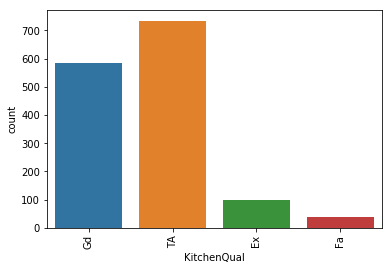

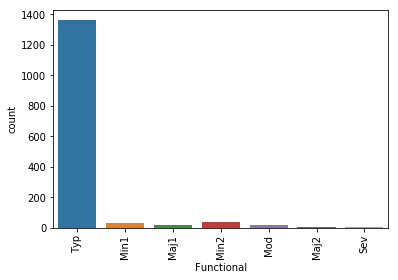

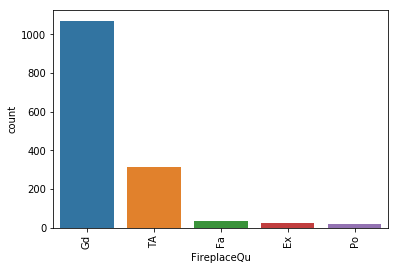

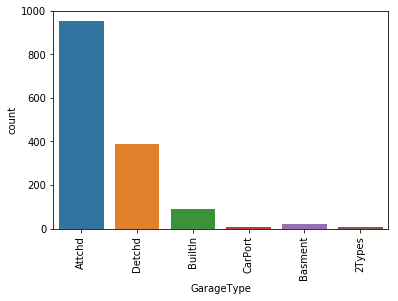

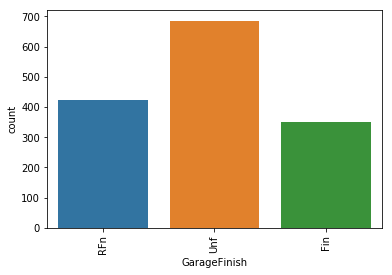

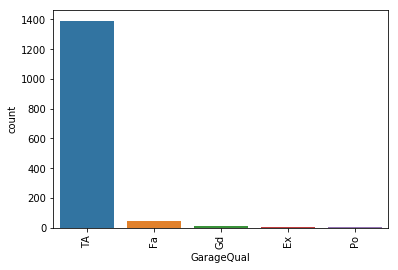

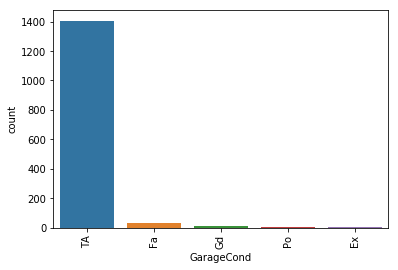

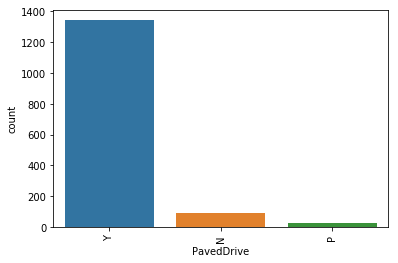

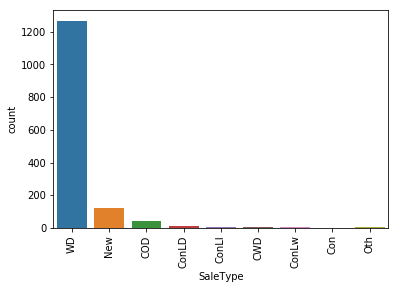

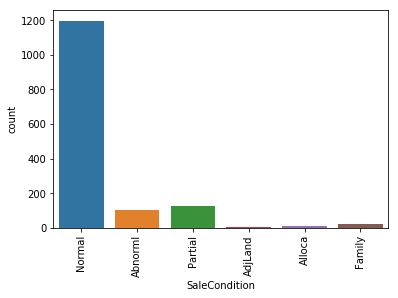

In [292]:
df1 = df.select_dtypes([np.object])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)
    xticks(rotation = 90)

In [293]:
### From above graphs we can easily remove a couple of variables because these variables 
### do not have a proper distribution and won't add much value to the model

df = df.drop(['Street','LandContour', 'Utilities','LandSlope','Condition1','Condition2',
              'BldgType','RoofMatl','MasVnrType','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
              'Functional','Electrical','GarageQual','GarageCond','PavedDrive'],axis=1)

In [294]:
### Assigning very small values of variables to Others

df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'], 'Others')
df['SaleType'] = df['SaleType'].replace(['ConLD','ConLw','CWD','Con','Oth','ConLI','COD'], 'Others')
df['GarageType'] = df['GarageType'].replace(['carPort','Basment','2Types'], 'Others')
df['FireplaceQu'] = df['FireplaceQu'].replace(['Fa','Ex','Po'], 'Others')
df['KitchenQual'] = df['KitchenQual'].replace(['Ex','Fa'], 'Others')
df['HeatingQC'] = df['HeatingQC'].replace(['Fa','Po'], 'Others')

df['BsmtExposure'] = df['BsmtExposure'].replace(['Gd','Mn'], 'Others')

df['ExterQual'] = df['ExterQual'].replace(['Fa','Ex'], 'Others')
df['Foundation'] = df['Foundation'].replace(['Wood','Stone','BrkTil','Slab'], 'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Gambrel','Mansard','Flat','Shed'], 'Others')

df['Exterior1st'] = df['Exterior1st'].replace(['Stucco','AsbShng','BrkComm','ImStucc','AsphShn','Stone','CBlock'], 'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['BrkFace','Stucco','AsbShng','Brk Cmn','ImStucc','AsphShn','Stone','Other','CBlock'], 'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['1.5Unf','SFoyer','2.5Unf','2.5Fin'], 'Others')


df['Neighborhood'] = df['Neighborhood'].replace(['Veenker','NPkVill','Blmngtn','BrDale','SWISU','Blueste','MeadowV'], 'Others')

df['LotConfig'] = df['LotConfig'].replace(['FR2','FR3'], 'Others')

df['LotShape'] = df['LotShape'].replace(['IR2','IR3'], 'Others')

df['MSZoning'] = df['MSZoning'].replace(['C (all)','RH'], 'Others')



In [295]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [296]:
# split into X and y
X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y = df['SalePrice']

In [297]:
# Categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,Gd,PConc,Gd,No,GLQ,Ex,Gd,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,Others,Others,1Story,Gable,MetalSd,MetalSd,TA,CBlock,Gd,Others,ALQ,Ex,TA,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,Gd,PConc,Gd,Others,GLQ,Ex,Gd,TA,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,TA,Others,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,Others,NoRidge,2Story,Gable,VinylSd,VinylSd,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,WD,Normal


In [298]:
# Convert to dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Others,ExterQual_TA,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,KitchenQual_Others,KitchenQual_TA,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0


In [299]:
# dropping initial categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [300]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [301]:
# Feature Scaling
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_Others',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_Others',
       'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=115)

In [302]:
### Test Train Split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [303]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_Others',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_Others',
       'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=115)

### Sample Linear Regression Model

Without the use of RFE or Feature selection just the entire stack of variables

In [304]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.8781346811365228


### Ridge Regression Model

In [305]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [306]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020343,0.030545,0.000000,0.000000,0.0001,{'alpha': 0.0001},-21049.476753,-20802.777391,-20942.545270,-19580.346334,-20661.779334,-20607.818015,529.774332,28,-17641.656416,-14404.843750,-16667.047440,-17811.723369,-17503.411798,-16805.736555,1263.411505
1,0.004423,0.000529,0.000000,0.000000,0.001,{'alpha': 0.001},-21049.405728,-20802.735147,-20942.573004,-19580.177294,-20661.186552,-20607.648640,529.816323,27,-17641.623472,-14404.823760,-16667.027734,-17811.708674,-17503.411539,-16805.719036,1263.412807
2,0.003874,0.002366,0.001845,0.001889,0.01,{'alpha': 0.01},-21048.694681,-20802.313926,-20942.847492,-19578.495142,-20655.313400,-20605.966975,530.238529,26,-17641.294527,-14404.624153,-16666.830609,-17811.560582,-17503.407115,-16805.543397,1263.425403
3,0.005270,0.001467,0.001837,0.001867,0.05,{'alpha': 0.05},-21045.539787,-20800.468195,-20944.006375,-19571.192315,-20630.354828,-20598.750329,532.161121,25,-17639.843306,-14403.743470,-16665.953035,-17810.878535,-17503.474849,-16804.778639,1263.486353
4,0.005119,0.001675,0.000000,0.000000,0.1,{'alpha': 0.1},-21041.585059,-20798.230498,-20945.321527,-19562.428135,-20601.543352,-20590.264186,534.635900,24,-17638.052868,-14402.656964,-16664.852877,-17810.005046,-17503.491943,-16803.811940,1263.549717


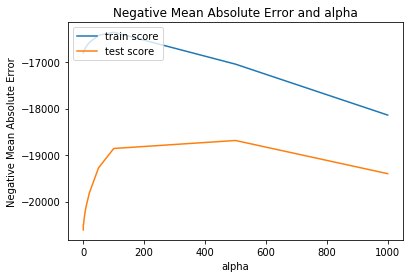

In [307]:
# plotting mean test and train scores 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [308]:
### From the above graph we can see that there are two significant values of Alpha or Lambda --> 100, 500.
### We Get better results by using 100 as the alpha values

In [309]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.98116284e+03, -1.85259860e+03,  4.05220743e+03,  1.28950999e+04,
        4.99315552e+03,  2.81230153e+03,  2.86058757e+03,  2.11812268e+03,
        8.42254649e+02,  3.80329139e+02,  5.84047236e+02,  1.60375608e+03,
        5.57085679e+03,  8.67835140e+03, -1.58208956e+03,  1.11613035e+04,
        4.29518165e+03,  7.07718727e+02,  4.78290743e+03,  2.00342375e+03,
       -8.92796594e+02, -2.00471042e+03,  3.42426287e+03,  2.56954409e+03,
        1.44890000e+03,  6.41152672e+03,  9.19263311e+02,  2.12809190e+03,
       -5.44949531e+02,  5.23104830e+02,  1.26514671e+03,  1.48174432e+03,
       -4.76413107e+02, -5.82441555e+02, -5.10224254e+02, -1.63372757e+03,
       -1.39203839e+03,  3.85885691e+02, -1.78372641e+03, -1.02669777e+03,
        3.97190309e+02,  2.23801872e+03, -1.08094254e+02, -1.97566943e+03,
        7.76004506e+02, -5.70286552e+02,  4.17507047e+03, -5.11756487e+03,
       -8.08723152e+02, -1.22027350e+03, -2.10637788e+03, -3.05579894e+03,
       -1.86136659e+03,  

Text(0.5,1,'Coefficients in the Ridge Model')

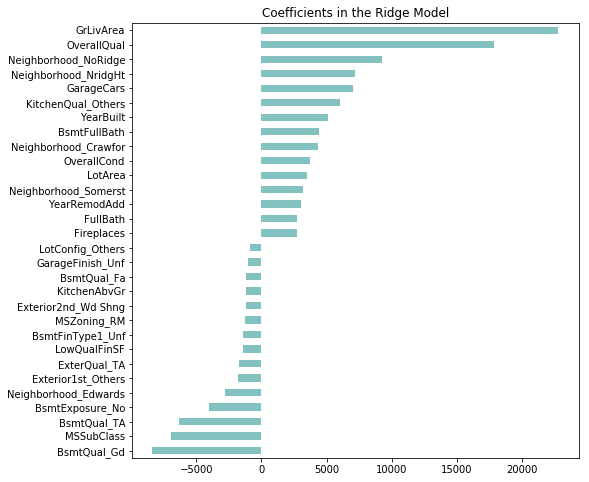

In [310]:
plt.figure(figsize=(8,8))
coef1 = pd.Series(ridge.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(15), coef.tail(15)])
imp_coef.plot(kind = "barh", color=(0.2, 0.6, 0.6, 0.6))
plt.title("Coefficients in the Ridge Model")

#### The above graph depicts the highly positive and highly negative impacting features in our model.

In [311]:
y_train_pred_ridge = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8717279767837522
0.8623370730735824


#### The above are the train and test scores for Ridge Regression Model.

In [312]:
print(coef1.tail(10))
print("---"*30)
print(coef1.head(10))

FullBath                 4782.907430
OverallCond              4993.155525
1stFlrSF                 5570.856791
KitchenQual_Others       6026.953819
GarageCars               6411.526722
Neighborhood_NridgHt     6702.110836
2ndFlrSF                 8678.351397
Neighborhood_NoRidge     9084.110528
GrLivArea               11161.303452
OverallQual             12895.099939
dtype: float64
------------------------------------------------------------------------------------------
BsmtQual_Gd            -9628.164387
MSSubClass             -6981.162845
BsmtQual_TA            -6945.439263
Neighborhood_Edwards   -5117.564870
BsmtExposure_No        -3896.392817
Exterior1st_Others     -3475.956754
Neighborhood_NAmes     -3055.798940
Neighborhood_Sawyer    -2645.207417
GarageFinish_RFn       -2454.916684
GarageFinish_Unf       -2426.751239
dtype: float64


### Lasso Regression Model

In [313]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   19.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [314]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.175991,0.042920,0.000992,0.001535,0.0001,{'alpha': 0.0001},-21050.277411,-20802.441372,-20943.635997,-19573.440334,-20600.916899,-20594.589156,531.996904,28,-17641.564352,-14404.764585,-16667.147617,-17812.503980,-17507.588045,-16806.713716,1264.013670
1,0.153545,0.007046,0.001085,0.001503,0.001,{'alpha': 0.001},-21050.269716,-20802.438047,-20943.637111,-19573.426894,-20600.898406,-20594.580788,532.000577,27,-17641.560740,-14404.762032,-16667.146338,-17812.502283,-17507.585855,-16806.711450,1264.013678
2,0.147883,0.011339,0.000800,0.001600,0.01,{'alpha': 0.01},-21050.192765,-20802.404796,-20943.648253,-19573.292492,-20600.713475,-20594.497117,532.037318,26,-17641.524623,-14404.736508,-16667.133541,-17812.485318,-17507.563950,-16806.688788,1264.013762
3,0.152195,0.008737,0.001605,0.001966,0.05,{'alpha': 0.05},-21049.832676,-20802.257014,-20943.697773,-19572.695279,-20599.891572,-20594.121638,532.197531,25,-17641.362709,-14404.623064,-16667.076667,-17812.409903,-17507.466593,-16806.587787,1264.013946
4,0.155381,0.013975,0.000000,0.000000,0.1,{'alpha': 0.1},-21049.387124,-20802.072287,-20943.759674,-19571.948888,-20598.864215,-20593.653236,532.398718,24,-17641.160660,-14404.481260,-16667.005574,-17812.315621,-17507.344893,-16806.461601,1264.014221


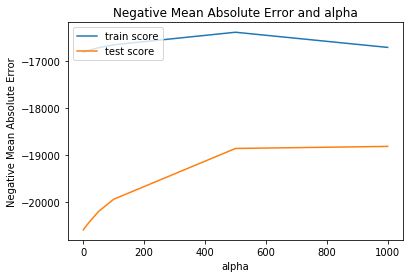

In [315]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### The above graph depicts that the best value for alpha is 1000

In [316]:
alpha = 1000

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [317]:
lasso.coef_

array([-6960.55921358,  -645.5168144 ,  3505.91851133, 17814.5143921 ,
        3706.62301409,  5121.27696544,  3061.23293131,  1210.73126713,
           0.        ,    -0.        ,     0.        ,   691.00701654,
         351.25876826,     0.        , -1431.94796497, 22770.83408158,
        4432.47597441,     0.        ,  2697.01837739,     0.        ,
          -0.        , -1149.86991515,     0.        ,  2696.73943905,
        1165.05264029,  7048.81453425,     0.        ,  1904.03606123,
          -0.        ,    -0.        ,   341.89398468,   599.1842569 ,
          -0.        ,    -0.        ,    -0.        ,  -392.13235545,
        -701.79580809,     0.        , -1269.56480688,    -0.        ,
          -0.        ,  1581.62881668,     0.        ,  -848.48916   ,
         839.62521059,     0.        ,  4372.83072704, -2753.18899913,
          -0.        ,    -0.        ,  -110.54658492,    -0.        ,
          -0.        ,  9269.18537306,  7142.92444608,  -423.32598114,
      

#### From the above output we can see that a lot features are being converted to 0, leading to feature selection. All the least important variables are eliminated

Text(0.5,1,'Coefficients in the Model')

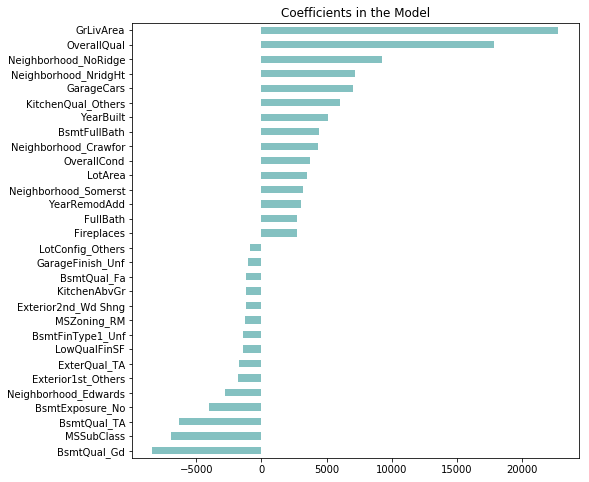

In [318]:
plt.figure(figsize=(8,8))
coef = pd.Series(lasso.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(15), coef.tail(15)])
imp_coef.plot(kind = "barh", color=(0.2, 0.6, 0.6, 0.6))
plt.title("Coefficients in the Model")

#### The above graph depicts the highly positive and highly negative impacting features in our model.

In [319]:
print(coef.tail(10))
print("---"*30)
print(coef.head(10))

OverallCond              3706.623014
Neighborhood_Crawfor     4372.830727
BsmtFullBath             4432.475974
YearBuilt                5121.276965
KitchenQual_Others       6022.677427
GarageCars               7048.814534
Neighborhood_NridgHt     7142.924446
Neighborhood_NoRidge     9269.185373
OverallQual             17814.514392
GrLivArea               22770.834082
dtype: float64
------------------------------------------------------------------------------------------
BsmtQual_Gd            -8351.461544
MSSubClass             -6960.559214
BsmtQual_TA            -6299.282589
BsmtExposure_No        -4048.562661
Neighborhood_Edwards   -2753.188999
Exterior1st_Others     -1764.810226
ExterQual_TA           -1750.418145
LowQualFinSF           -1431.947965
BsmtFinType1_Unf       -1394.592139
MSZoning_RM            -1269.564807
dtype: float64


In [320]:
# This is a good way to see how model predict data
p_pred = lasso.predict(X_train)

In [321]:
y_train_pred_lasso = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.861586673062928
0.8570333243330241


#### The above are the train and test scores for Lasso Regression Model.

In [322]:
p_pred

array([ 81810.2936988 , 333198.65760205, 121529.29483754, ...,
       305712.91040025, 306394.728993  , 112880.89938916])

In [323]:
p_pred.shape

(1021,)

## Conclusion

### From the above results we can clearly see that Ridge Regression Algorithm performs better in terms of accuracy in both training and test dataset as well as in computational time. The effficiency of Ridge Regression is comparatively better than Lasso Regression in this case.

#### The computational time for Lasso came out to be approximately: 20 Seconds and the computational time for Ridge came out to be less than 2 seconds, thus ridge performs better in this case and lasso becomes computationaly expensive.

#### The Lambda or Alpha values for both Ridge and Lasso Regression came out to be 100 and 1000 respectively. For Ridge regression a better result was seen with lambda as 100 and not as 500.

- <b>Ridge Regression</b>:

    - Test Score: 86%
    - Train Score: 87%
    - Highly Significant variables that positively affect the price are:
        - <i>OverallQual             12895.099939
        - GrLivArea               11161.303452
        - Neighborhood_NoRidge     9084.110528
        - 2ndFlrSF                 8678.351397
        - Neighborhood_NridgHt     6702.110836
        - GarageCars               6411.526722</i>
    - Highly Significant variables that negatively affect the price are:
        - <i>BsmtQual_Gd            -9628.164387
        - MSSubClass             -6981.162845
        - BsmtQual_TA            -6945.439263
        - Neighborhood_Edwards   -5117.564870
        - BsmtExposure_No        -3896.392817</i>

- <b>Lasso Regression</b>:
    - Test Score: 86%
    - Train Score: 85%
    - Highly Significant variables that positively affect the price are:
        -
        - <i>GrLivArea               22770.834082
        - OverallQual             17814.514392
        - Neighborhood_NoRidge     9269.185373
        - Neighborhood_NridgHt     7142.924446
        - GarageCars               7048.814534
        - KitchenQual_Others       6022.677427</i>
    - Highly Significant variables that negatively affect the price are:
        - <i>BsmtQual_Gd            -8351.461544
        - MSSubClass             -6960.559214
        - BsmtQual_TA            -6299.282589
        - BsmtExposure_No        -4048.562661
        - Neighborhood_Edwards   -2753.188999</i>
    
 

From both the models we can see that: OverallQual, GrLivArea, Neighborhood_NoRidge,Neighborhood_NridgHt, GarageCars are the common positive variables that affect the model. So in order to make the purchase we need to focus on such properties which satisfy this condition